In [4]:
# do the necessary imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

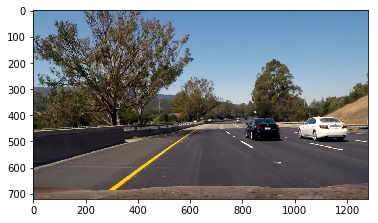

In [215]:
# read in an image
image = mpimg.imread('test6.jpg')

plt.imshow(image)

In [216]:
# function that applies Sobel x or y and then takes an absolute values and applies to the threshold
def abs_sobel_thresh(img, orient ='x', thresh_min=0, thresh_max=255):
    
    # convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # take the derivate in x or y as per given orient
    sobel = []
    if orient =='x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=15)
    if orient =='y':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    
    # take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    
    # scale it to 8-bit(0-255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # create a mask of 1's where the scaled gradient magnitude is between thresh_min and thresh_max
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel>=thresh_min) & (scaled_sobel<=thresh_max)] = 1
    
    return sbinary

In [217]:
# function that applies sobel x and y and then computes magnitude of the gradient and applies the threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # convert to grayscale    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # take the gradients in x and y
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # calculate the magnitude
    abs_sobelxy = np.sqrt(sobelx**2 + sobely**2)
    
    # scale it to 8-bit (0 -255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    
    # create a binary mask where mag thresholds are met
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    
    return sbinary

In [218]:
# function that applies Sobel X and Y and then computes the direction of the gradient and applies the threshold
def dir_thresh(img, sobel_kernel=3, thresh=(0, np.pi/2)) :
    
    # convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # take the gradients in x and y
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    
    # take the abs value of sobelx and sobely
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    
    # use np.arctan2() to calculate the direction of the gradient
    arctan_sobel = np.arctan2(abs_sobely, abs_sobelx)
    
    binary_output = np.zeros_like(arctan_sobel)
    
    # apply the threshold
    binary_output[(arctan_sobel>=thresh[0]) & (arctan_sobel<=thresh[1])] = 1
    
    return binary_output

In [219]:
def luv_gradient(img):
     # convert to LUV color space
    luv = cv2.cvtColor(img, cv2.COLOR_BGR2Luv)
    l = luv[:,:,0]
        
    l_binary = np.zeros_like(l)
    l_binary[(l>225) & (l<=255)] = 1      
    
    return l_binary

In [220]:
def lab_gradient(img):
    # convert to LAB color space
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    b = lab[:,:,2]
        
    b_binary = np.zeros_like(b)
    b_binary[(b>155) & (b<=200)] = 1    
    
    return b_binary

In [221]:
def avg_brightness(rgb_image):
    
        # Convert image to HSV
        hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

        # Add up all the pixel values in the V channel
        sum_brightness = np.sum(hsv[:,:,2])
        
        # and the sum calculated above
        shape = hsv.shape
        avg = sum_brightness/(shape[0]*shape[1])  
        
        print(avg)

        return avg

In [222]:
# function to define pipeline

def pipeline(img, s_thresh=(100, 200), sx_thresh=(20,100)):
    
    avg_brightness(img)
    
    # convert to HLS and separate s channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s = hls[:,:,2]
    l = hls[:,:,1]                    
    
    # sobel x    
    gradx = abs_sobel_thresh(img, orient='x', thresh_min=20, thresh_max=100) # sobelx
    grady = abs_sobel_thresh(img, orient='y', thresh_min=20, thresh_max=100) # sobely
    mag_binary = mag_thresh(img, sobel_kernel = 3, mag_thresh=(30, 100)) # mag threshold
    dir_binary = dir_thresh(img, sobel_kernel = 15, thresh=(0.7, 1.3)) # direction of the gradient

    combined_sobel = np.zeros_like(dir_binary)
    combined_sobel[(gradx == 1)&(dir_binary == 1)] = 1   
    
    # threshold color channel
    s_binary = np.zeros_like(s)
    s_binary[(s>s_thresh[0]) & (s<=s_thresh[1])] = 1
    
    
    combined = np.zeros_like(s)
    
    combined[((lab_gradient(img) == 1) | (luv_gradient(img) == 1))] = 1
    
    #combined[(s_binary == 1) | (gradx == 1)] = 1
    
    return  combined

118.682226563


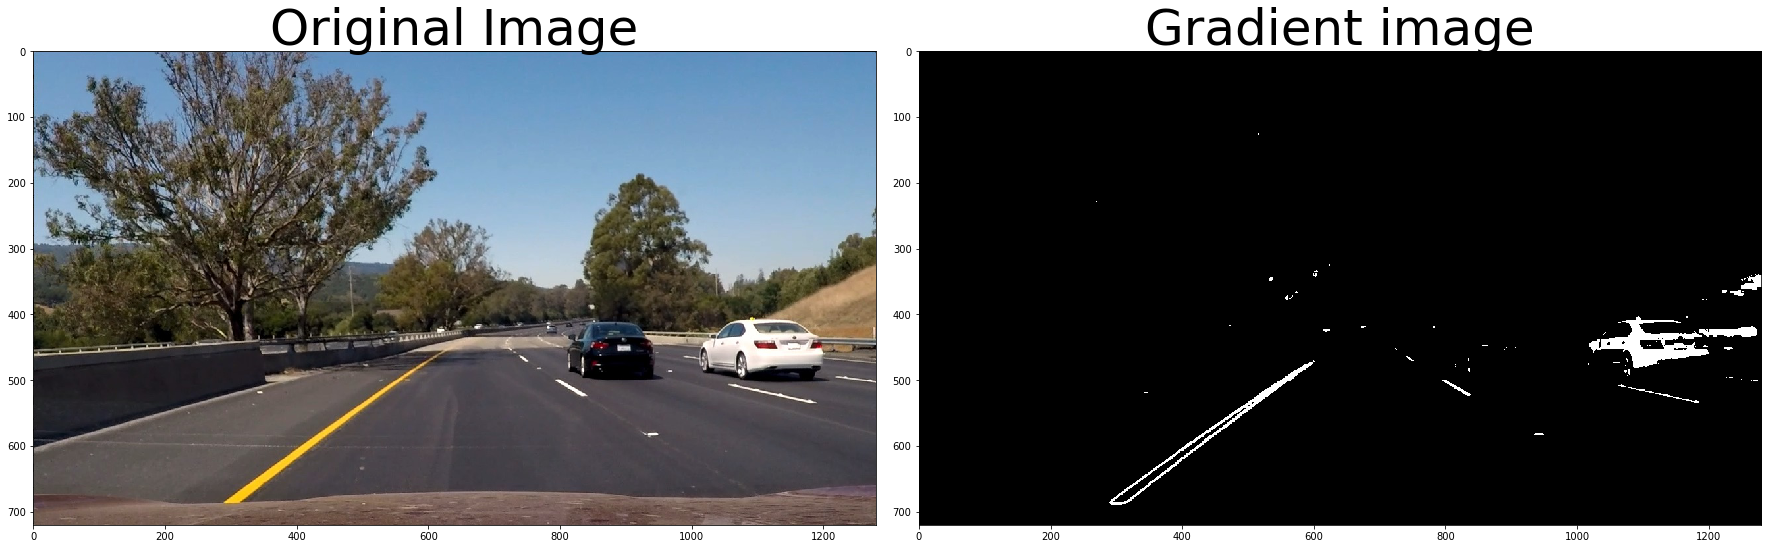

In [223]:
# call pipeline

result = pipeline(image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize =(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(result, cmap = 'gray')
ax2.set_title('Gradient image', fontsize = 50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)